# Data Science / IA > Machine Learning > Deep Learning
Le Deep Learning a besoin de beaucoup de données pour être efficace

# Type d'algorithmes

## Classification

Exemple :
 - Spam/Pas Spam
 - Animal/Végétal

La classification donne un résultat discret (1,0)

## Régression

Prévision, mais d'une variable continue
Exemple : panier moyen

# Création algorithme machine learning

In [6]:
import sklearn

import numpy as np

import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

## 1. Chargement du jeu de données 'IRIS'

In [7]:
df = sns.load_dataset('iris')

df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


sepal_length  sepal_width  petal_length  petal_width     species
110           6.5          3.2           5.1          2.0   virginica
1             4.9          3.0           1.4          0.2      setosa
88            5.6          3.0           4.1          1.3  versicolor
138           6.0          3.0           4.8          1.8   virginica
113           5.7          2.5           5.0          2.0   virginica

In [15]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## 2. Visualisation des données

C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


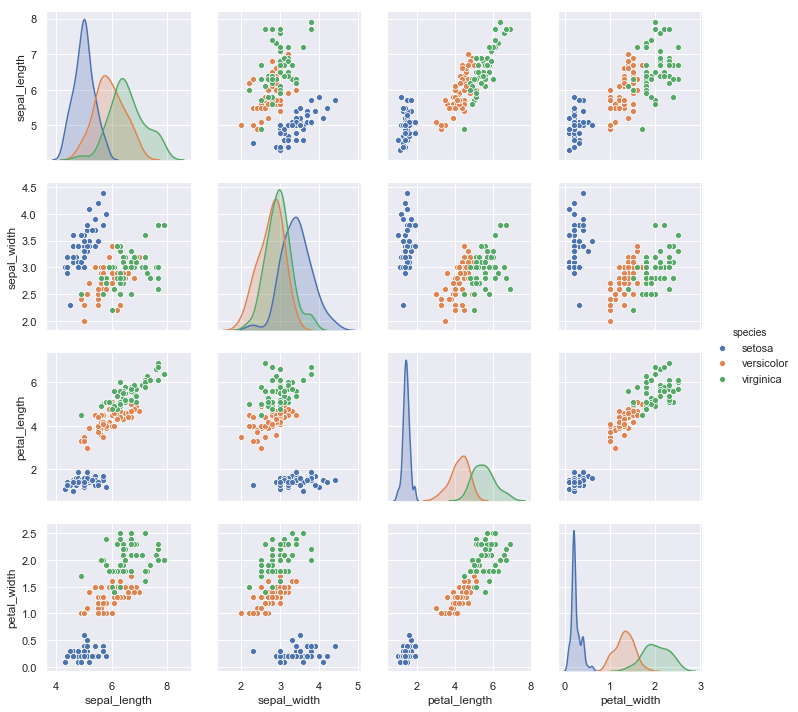

In [17]:
sns.pairplot(df, hue='species')

## 3. Premier algo : plus proches voisins

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# instanciation

clf = KNeighborsClassifier()

# quels sont les facteurs explicatifs (critères)

X = df.iloc[:, :4]

# Quel est le libellé (ce qu'on cherche à deviner)

y = df['species']

# apprentissage

clf.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
clf.predict(X.iloc[:4])

array(['setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [36]:
clf.predict_proba(X.sample(5))

array([[0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ]])

### 3.1 Comparaison du résultat

In [37]:
y_pred = clf.predict(X)

In [38]:
(y_pred == y).mean()

0.9666666666666667

Résultat : 97% de bon résultat sur le jeu de données

C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


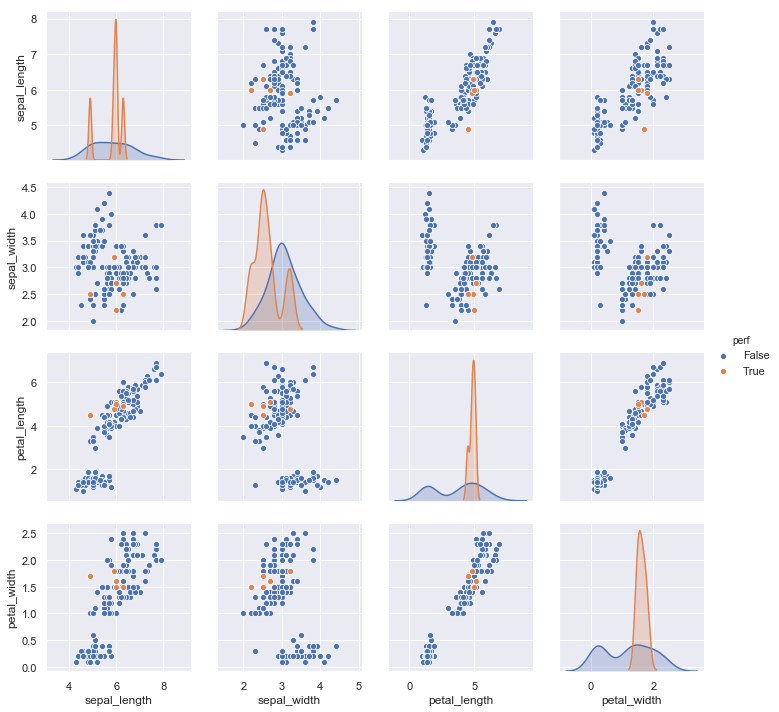

In [41]:
df['perf'] = (y_pred != y)

sns.pairplot(df, hue='perf', vars = df.columns[:4])

Ce qui pose problème, sont les éléments qui étaient à la frontière des deux espèces

### 3.2 Modification des paramètres du constructeurs pour modifier les performances

#### 3.2.1 Modification du nombre de voisins

In [70]:
X = df.iloc[:, :4]
y = df['species']
max_neighbors = 70
result = []
for i in range(1,max_neighbors):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    result.append((y_pred == y).mean())


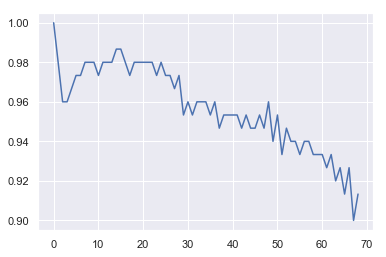

In [71]:
plt.plot(result)

### 3.3 Validation croisée

**Ne pas utiliser le même je de données pour l'apprentissage et le test

Il faut séparer le jeu de test, en gardant le maximum de données et en ayant une bonne répartition des espèces

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, _test = train_test_split(X,y, test_size = 0.3, stratify=y)

In [83]:
max_neighbors = 50
result_crossed = []
for i in range(1,max_neighbors):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    result_crossed.append((y_pred == y_test).mean())

AttributeError: 'list' object has no attribute 'mean'

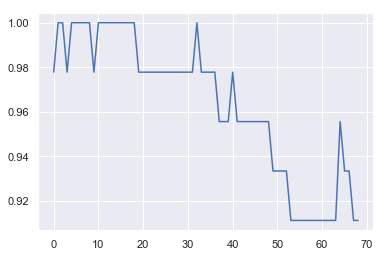

In [84]:
plt.plot(result_crossed)

In [94]:
max_neighbors = 30
nb = 1000
results = []
for i in range(1,max_neighbors):

    score = 0
    clf = KNeighborsClassifier(n_neighbors=i)
    for k in range(nb):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)
        
        clf.fit(X_train,y_train)
        
        y_pred = clf.predict(X_test)
        
        score += (y_pred == y_test).mean()
        
    results.append(score / nb)


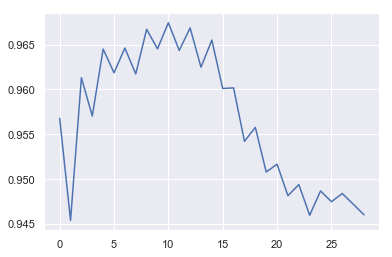

In [95]:
plt.plot(results)

# 3. Exemple du Titanic

## 3.1 Chargement des données

In [153]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 3.2 Extraction des données

In [154]:
# On enlève les lignes avec des âges vides
df = df.dropna(subset=['age'])

In [159]:
X = df.loc[:, ['age', 'fare', 'pclass']]
X['male'] = (df['sex'] == 'male')

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
age       714 non-null float64
fare      714 non-null float64
pclass    714 non-null int64
male      714 non-null bool
dtypes: bool(1), float64(2), int64(1)
memory usage: 23.0 KB


In [160]:
y = (df['survived'] == 1)
y[:4]

0    False
1     True
2     True
3     True
Name: survived, dtype: bool

## 3.3 Première analyse

In [161]:
max_neighbors = 20
result = []
for i in range(1,max_neighbors):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    result.append((y_pred == y).mean())

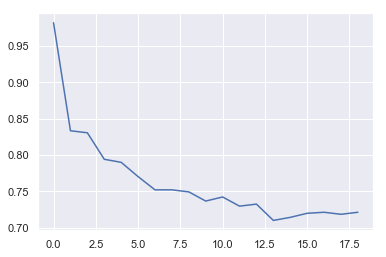

In [162]:
plt.plot(result)

# 3.4 Validation des données

In [174]:
max_neighbors = 150
nb = 10
results = []
for i in range(1,max_neighbors):

    score = 0
    clf = KNeighborsClassifier(n_neighbors=i)
    for k in range(nb):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)
        
        clf.fit(X_train,y_train)
        
        y_pred = clf.predict(X_test)
        
        score += (y_pred == y_test).mean()
        
    results.append(score / nb)


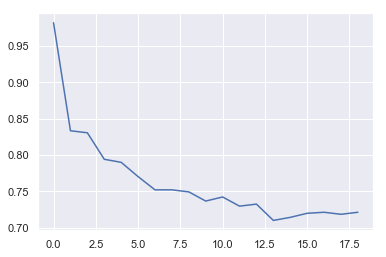

In [175]:
plt.plot(result)

In [171]:
X = df.loc[:, ['age', 'fare', 'pclass']]
X['male'] = (df['sex'] == 'male')

y = (df['survived'] == 1)

clf = KNeighborsClassifier(n_neighbors=5)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)
        
clf.fit(X_train,y_train)
        
y_pred = clf.predict(X_test)

print((y_pred == y_test).mean())

0.7116279069767442


In [191]:
# Faux positifs (dit qu'ils survivent mais en fait ils meurt)
f_p = ((y_pred == True) & (y_test == False)).sum()
f_p

16

In [192]:
# Faux négatifs(dit qu'ils meurent mais en fait ils survivent)
f_n = ((y_pred == False) & (y_test == True)).sum()
f_n

53

In [193]:
# Vrai positifs
t_p = ((y_pred == True) & (y_test == True)).sum()
t_p

34

In [194]:
# Vrai négatifs
t_n = ((y_pred == False) & (y_test == False)).sum()
t_n

112

In [200]:
precision = t_p / (t_p + f_p)
precision

0.68

In [201]:
repel = t_p / (t_p + f_n)
repel

0.39080459770114945

In [202]:
f1_score = 2 * repel * precision / (repel + precision)
f1_score

0.4963503649635037

In [211]:
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
matrix.transpose()

array([[112,  53],
       [ 16,  34]], dtype=int64)

In [205]:
(matrix * np.matrix.transpose(matrix)) / np.linalg.det(matrix)

array([[112,  53],
       [ 16,  34]], dtype=int64)

In [198]:
np.linalg.det(matrix)

2959.9999999999973

In [207]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.4963503649635037

In [216]:
from sklearn.ensemble import RandomForestClassifier


clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train)
y_pred = clf_forest.predict(X_test)
f1_score(y_test, y_pred)

ImportError: cannot import name 'SVC' from 'sklearn.ensemble' (C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


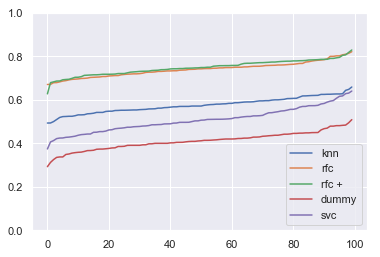

In [238]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
algos = [
    (KNeighborsClassifier(),'knn'),
    (RandomForestClassifier(), 'rfc'),
    (RandomForestClassifier(n_estimators = 120), 'rfc +'),
    (DummyClassifier(), 'dummy'),
    (SVC(gamma = 'auto'), 'svc'),
    
]
nb_splits = 100
#Boucle sur les algorithmes
for clf, name in algos:
    scores = []
    
    for i in range(nb_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
        
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        
        scores.append(f1_score(y_test, y_pred))
    
    plt.plot(np.sort(scores), label=name)

plt.ylim(0,1)
plt.legend()


On choisit les random Forest, et on va voir les colonnes

In [236]:
clf = RandomForestClassifier(n_estimators = 20)

columns = [
    'pclass',
    'age',
    'sibsp',
    'parch',
    'fare',
    'adult_male',
    'alone'
]
nb_splits = 100

X = df.loc[:, ['age', 'fare', 'pclass']]
X['male'] = (df['sex'] == 'male')
#Boucle sur les algorithmes
for column in columns:
    scores = []
    X = df[[column]]
    for i in range(nb_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
        
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        
        scores.append(f1_score(y_test, y_pred))
    
    plt.plot(np.sort(scores), label=column)

plt.ylim(0,1)
plt.legend()

KeyError: "['male'] not in index"

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
survived       714 non-null int64
pclass         714 non-null int64
sex            714 non-null object
age            714 non-null float64
sibsp          714 non-null int64
parch          714 non-null int64
fare           714 non-null float64
embarked       712 non-null object
class          714 non-null category
who            714 non-null object
adult_male     714 non-null bool
deck           184 non-null category
embark_town    712 non-null object
alive          714 non-null object
alone          714 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


# 4. Société de télécom

In [239]:
df = pd.read_csv('https://bit.ly/2Pkupqx')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
churn                         5000 non-null object
accountlength                 5000 non-null int64
internationalplan             5000 non-null object
voicemailplan                 5000 non-null object
numbervmailmessages           5000 non-null int64
totaldayminutes               5000 non-null float64
totaldaycalls                 5000 non-null int64
totaldaycharge                5000 non-null float64
totaleveminutes               5000 non-null float64
totalevecalls                 5000 non-null int64
totalevecharge                5000 non-null float64
totalnightminutes             5000 non-null float64
totalnightcalls               5000 non-null int64
totalnightcharge              5000 non-null float64
totalintlminutes              5000 non-null float64
totalintlcalls                5000 non-null int64
totalintlcharge               5000 non-null float64
numbercustomerservicecal

In [302]:
#pouvoir générer les permutations
import itertools
#Pouvoir faire un reduce
import functools 

from operator import itemgetter
X = df
#On transforme les chaines de caractères Yes/No en booléen
X['is_internationalplan']=(df['internationalplan'] == 'yes')
X['is_voicemailplan']=(df['voicemailplan'] == 'yes')

#On enlève les colonnes concernées
X = X.drop(['churn', 'internationalplan', 'voicemailplan'], axis = 1)
y = (df['churn'] =='Yes')

clf = RandomForestClassifier(n_estimators = 20)

nb_splits = 3
nb_columns = 4
#Boucle sur les algorithmes

for i in range(1,nb_columns):
    #on génère les permutations possibles
    permutations = list(itertools.permutations(X.columns, i))
    median = []
    for columns in permutations:
        columns = list(columns)
        scores = []
        for i in range(nb_splits):
            X_train, X_test, y_train, y_test = train_test_split(X.loc[:, columns], y, test_size = 0.3, stratify = y)
        
            clf.fit(X_train, y_train)
        
            y_pred = clf.predict(X_test)
        
            scores.append(f1_score(y_test, y_pred))
        median.append((columns,np.median(scores)))
    print(max(median,key=itemgetter(1)))



(['totaldaycharge'], 0.27397260273972607)
(['numbercustomerservicecalls', 'totaldayminutes'], 0.43230403800475065)
(['totaldayminutes', 'numbercustomerservicecalls', 'totaleveminutes'], 0.6050420168067226)


C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted',

C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


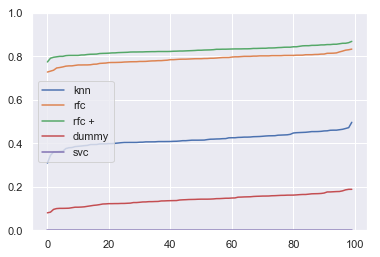

In [249]:
algos = [
    (KNeighborsClassifier(),'knn'),
    (RandomForestClassifier(), 'rfc'),
    (RandomForestClassifier(n_estimators = 120), 'rfc +'),
    (DummyClassifier(), 'dummy'),
    (SVC(gamma = 'auto'), 'svc'),
    
]
nb_splits = 100
#Boucle sur les algorithmes
for clf, name in algos:
    scores = []
    
    for i in range(nb_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
        
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        
        scores.append(f1_score(y_test, y_pred))
    
    plt.plot(np.sort(scores), label=name)

plt.ylim(0,1)
plt.legend()

In [ ]:
fig, axs = plt.subplots(5, 1)
fig.figsize=(20,20)


In [297]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#pouvoir générer les permutations
import itertools
#Pouvoir faire un reduce
import functools 

from operator import itemgetter
X = df
#On transforme les chaines de caractères Yes/No en booléen
X['is_internationalplan']=(df['internationalplan'] == 'yes')
X['is_voicemailplan']=(df['voicemailplan'] == 'yes')

#On enlève les colonnes concernées
X = X.drop(['churn', 'internationalplan', 'voicemailplan'], axis = 1)
y = (df['churn'] =='Yes')

clf = RandomForestClassifier(n_estimators = 20)

nb_splits = 3
nb_columns = 5
#Boucle sur les algorithmes

for i in range(4,nb_columns):
    #on génère les permutations possibles
    permutations = list(itertools.permutations(X.columns, i))
    median = []
    for columns in permutations:
        columns = list(columns)
        scores = []
        for i in range(nb_splits):
            X_train, X_test, y_train, y_test = train_test_split(X.loc[:, columns], y, test_size = 0.3, stratify = y)
        
            clf.fit(X_train, y_train)
        
            y_pred = clf.predict(X_test)
        
            scores.append(f1_score(y_test, y_pred))
        median.append((columns,np.median(scores)))
    print(max(median,key=itemgetter(1)))

